In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [8]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'])

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)

In [48]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [49]:
score = clf.score(X_test, y_test)
print(score)

0.9473684210526315


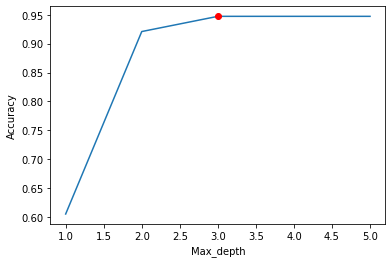

In [38]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

plt.plot(max_depth_range, accuracy)
plt.plot([accuracy.index(max(accuracy))+1], [max(accuracy)], 'ro')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.show()

In [46]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,petal width (cm),0.957
2,petal length (cm),0.043
0,sepal length (cm),0.000
1,sepal width (cm),0.000


In [50]:
from sklearn import tree

[Text(125.55000000000001, 190.26, 'X[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [37, 40, 35]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\ngini = 0.498\nsamples = 75\nvalue = [0, 40, 35]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 5.0\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(209.25, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

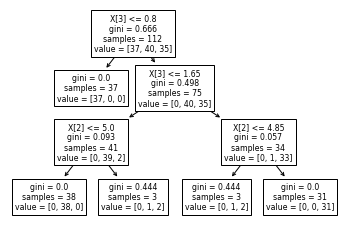

In [52]:
tree.plot_tree(clf)